# importing required libraries

In [1]:
import numpy as np
import tensorflow as tf

# getting corpus

In [2]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
corpus_raw = corpus_raw.lower()

# creating word index

In [3]:
words = []
for word in corpus_raw.split():
    if word != '.':
        words.append(word)
words = set(words)
word2int = {}
int2word = {}
vocab_size = len(words)
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# list the sentences as a list of words

In [4]:
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

# creating i/p o/p pairs

In [5]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [6]:
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

# creating one hot encoding vectors

In [7]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] 
y_train = []
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print y_train

[[ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0

# fixing i/p o/p vector size through place holder

In [8]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

# fixing size of w1 (weight matrix) through place holder

In [9]:
EMBEDDING_DIM = 5
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
hidden_representation = tf.add(tf.matmul(x,W1), b1)

# fixing size of the w2 (weight matrix) through place holder

In [10]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

# fixing output softmax function

In [11]:
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

# loss function

In [12]:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# training

In [13]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
n_iters = 10000
for i in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print (sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))


3.06223
2.90849
2.7982
2.71341
2.64456
2.58636
2.53569
2.49069
2.45018
2.4134
2.37984
2.34911
2.32091
2.29499
2.27114
2.24914
2.22881
2.20995
2.19239
2.17597
2.16056
2.14602
2.13225
2.11914
2.10663
2.09463
2.08309
2.07197
2.06123
2.05082
2.04074
2.03095
2.02143
2.01216
2.00314
1.99435
1.98577
1.9774
1.96923
1.96125
1.95346
1.94583
1.93838
1.93109
1.92396
1.91698
1.91015
1.90346
1.89691
1.89049
1.8842
1.87804
1.87199
1.86607
1.86026
1.85456
1.84897
1.84349
1.8381
1.83282
1.82763
1.82254
1.81753
1.81262
1.80779
1.80305
1.79839
1.79381
1.78931
1.78489
1.78054
1.77627
1.77207
1.76794
1.76388
1.75988
1.75595
1.75209
1.7483
1.74456
1.74089
1.73728
1.73373
1.73024
1.72681
1.72344
1.72013
1.71687
1.71367
1.71052
1.70743
1.70439
1.7014
1.69847
1.69559
1.69277
1.68999
1.68727
1.68459
1.68197
1.67939
1.67686
1.67439
1.67195
1.66957
1.66723
1.66494
1.66269
1.66049
1.65833
1.65621
1.65414
1.65211
1.65012
1.64816
1.64625
1.64438
1.64254
1.64074
1.63898
1.63725
1.63556
1.6339
1.63227
1.63068
1.62911


1.3352
1.33517
1.33514
1.33511
1.33508
1.33505
1.33502
1.33499
1.33496
1.33493
1.3349
1.33488
1.33485
1.33482
1.33479
1.33476
1.33473
1.3347
1.33468
1.33465
1.33462
1.33459
1.33457
1.33454
1.33451
1.33448
1.33446
1.33443
1.3344
1.33437
1.33435
1.33432
1.33429
1.33427
1.33424
1.33421
1.33419
1.33416
1.33413
1.33411
1.33408
1.33405
1.33403
1.334
1.33398
1.33395
1.33392
1.3339
1.33387
1.33385
1.33382
1.3338
1.33377
1.33374
1.33372
1.33369
1.33367
1.33364
1.33362
1.33359
1.33357
1.33355
1.33352
1.3335
1.33347
1.33345
1.33342
1.3334
1.33337
1.33335
1.33333
1.3333
1.33328
1.33325
1.33323
1.33321
1.33318
1.33316
1.33314
1.33311
1.33309
1.33307
1.33304
1.33302
1.333
1.33297
1.33295
1.33293
1.33291
1.33288
1.33286
1.33284
1.33281
1.33279
1.33277
1.33275
1.33273
1.3327
1.33268
1.33266
1.33264
1.33261
1.33259
1.33257
1.33255
1.33253
1.33251
1.33248
1.33246
1.33244
1.33242
1.3324
1.33238
1.33236
1.33233
1.33231
1.33229
1.33227
1.33225
1.33223
1.33221
1.33219
1.33217
1.33215
1.33213
1.33211
1.33209

1.32377
1.32377
1.32377
1.32377
1.32376
1.32376
1.32376
1.32376
1.32376
1.32375
1.32375
1.32375
1.32375
1.32374
1.32374
1.32374
1.32374
1.32373
1.32373
1.32373
1.32373
1.32372
1.32372
1.32372
1.32372
1.32372
1.32371
1.32371
1.32371
1.32371
1.3237
1.3237
1.3237
1.3237
1.32369
1.32369
1.32369
1.32369
1.32369
1.32368
1.32368
1.32368
1.32368
1.32367
1.32367
1.32367
1.32367
1.32366
1.32366
1.32366
1.32366
1.32366
1.32365
1.32365
1.32365
1.32365
1.32364
1.32364
1.32364
1.32364
1.32364
1.32363
1.32363
1.32363
1.32363
1.32362
1.32362
1.32362
1.32362
1.32362
1.32361
1.32361
1.32361
1.32361
1.3236
1.3236
1.3236
1.3236
1.3236
1.32359
1.32359
1.32359
1.32359
1.32358
1.32358
1.32358
1.32358
1.32358
1.32357
1.32357
1.32357
1.32357
1.32357
1.32356
1.32356
1.32356
1.32356
1.32355
1.32355
1.32355
1.32355
1.32355
1.32354
1.32354
1.32354
1.32354
1.32354
1.32353
1.32353
1.32353
1.32353
1.32353
1.32352
1.32352
1.32352
1.32352
1.32351
1.32351
1.32351
1.32351
1.32351
1.3235
1.3235
1.3235
1.3235
1.3235
1.3234

1.32212
1.32212
1.32212
1.32212
1.32212
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.32211
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.3221
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32209
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32208
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32207
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32206
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32205
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32204
1.32203
1.32203
1.3220

1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.32151
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.3215
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32149
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32148
1.32147
1.32147
1.32147
1.32147
1.32147
1.32147
1.32147
1.32147
1.32147
1.32147
1

1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.32121
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.3212
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.32119
1.3

1.32104
1.32104
1.32104
1.32104
1.32104
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32103
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102
1.32102


1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32092
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091
1.32091


# getting word vectors

In [14]:
vectors = sess.run(W1 + b1)
print(vectors[ word2int['queen'] ])

[ 2.91941857 -1.46123028 -0.38772389  0.65439284  2.92436075]


# finding closest words

In [24]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [27]:
print(int2word[find_closest(word2int['he'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

royal
king
he


# Visualization

('king', 0.4571884100581789)
('is', 0.80000000000000004)
('queen', 0.20000000000000001)
('royal', 0.35374497056905951)
('she', 0.45848076356042794)
('the', 0.65337616226065354)
('he', 0.40497817520445861)


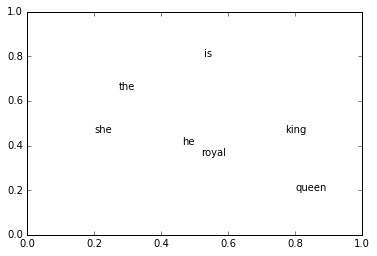

In [28]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.2, 0.8))
scaler.fit(vectors)
vectors = scaler.transform(vectors)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1]))
plt.show()